# Task 2 - Describe the development data set
Minimally, generate a table describing the empirical statistics of the development dataset in the file `dev.csv`. Use your tool of choice to do so. Produce another table summarizing the completeness of the record for each feature. Generate a graphic summarizing these descriptions that could be used as part of a logging procedure in a featurization pipeline. Assume that these procedures will be re-used as part of an overall machine-learning pipeline, and be prepared to comment on how this fact influences your choices in developing your response.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import logging

**Add logging functionality for featurization pipeline**

In [10]:
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
)

**Load the Data**

The data is saved in a data folder. We will create a pandas dataframe from the csv and convert the date column into datetime type.

In [11]:
cd = os.getcwd()
parent = os.path.dirname(cd)
data_folder = os.path.join(parent, 'data')

data = pd.read_csv(os.path.join(data_folder, 'dev.csv'))
data
#converting the date column to datetime
data['datetime_utc'] = pd.to_datetime(data['datetime_utc'])

**Exploring the data**

The data has been loaded and stored as a pandas dataframe. Some of the features will be explored and we will start to get a sense of what kind of data is present and what may be missing.

The following function will provide descriptive statistics and add it to the log. If there are missing values, they will either be removed or imputed based on a threshold of the percentage of missing data.

In [4]:
def describe_data(data):
    description = pd.DataFrame(data.describe())
    logging.info(f"The dataset has {data.shape[0]} observations and {data.shape[1]} features.")
    logging.info(f"The features in the dataset have the following empirical statistics: \n {description}")
    min_count = description.loc['count'].min()
    #find the feature with the minimum number of observations
    min_feature = description.columns[description.loc['count'] == min_count].values[0]
    max_count = description.loc['count'].max()
    max_feature = description.columns[description.loc['count'] == max_count].values[0]
    logging.info(f"The feature with the minimum number of observations is {min_feature} with {min_count} observations.")
    logging.info(f"The feature with the maximum number of observations is {max_feature} with {max_count} observations.")
    if max_count < data.shape[0]:
        logging.warning("There are no features with all observations.")
    
    percent_missing = data.iloc[:,1:].isna().mean() * 100
    logging.info(f"The percentage of missing values in the dataset is: \n {percent_missing}%")
    max_missing = data.isna().sum().max()
    threshold_for_imputing = 5
    #get rid of the missing values
    if max(percent_missing) > threshold_for_imputing:
        #impute the missing values
        logging.warning(f"{max(percent_missing)}% of the values are missing. Imputing missing values.")
        data.iloc[:,1:].fillna(data.mean(), inplace=True)
    elif percent_missing.max() > 0 and percent_missing.max() <= 10:
        len(data.columns[data.isnull().any()])
        logging.warning(f"Only {max(percent_missing)}% of the data is missing. Removing missing values.")
        data.dropna(inplace=True)
        logging.info(f"The dataset has {data.shape[0]} observations and {data.shape[1]} features after removing missing values.")

    
    return description


In [6]:
describe_data(data)


2024-10-15 21:32:27,600 - root - INFO - The dataset has 39744 observations and 16 features.
2024-10-15 21:32:27,601 - root - INFO - The features in the dataset have the following empirical statistics: 
               datetime_utc        wtempc        atempc  winddir_dcfn  \
count                39744  39408.000000  39548.000000  39548.000000   
mean   2023-07-27 23:52:30     11.273574     10.180927    160.069030   
min    2023-01-02 00:00:00      0.000000    -23.500000      0.000000   
25%    2023-04-15 11:56:15      2.700000      2.200000     48.000000   
50%    2023-07-27 23:52:30      9.600000      9.000000    183.000000   
75%    2023-11-08 11:48:45     21.000000     18.800000    199.000000   
max    2024-02-19 23:45:00     26.500000     33.300000    360.000000   
std                    NaN      8.958956      9.622149    106.167885   

           precp_in      relh_pct           spc       dox_mgl            ph  \
count  39548.000000  39551.000000  39401.000000  39390.000000  39313.

,datetime_utc,wtempc,atempc,winddir_dcfn,precp_in,relh_pct,spc,dox_mgl,ph,windgust_knots,wse1988,wvel_fps,mbars,windspeed_knots,par,turb_fnu
count,39744,39408.000000,39548.000000,39548.000000,39548.000000,39551.000000,39401.000000,39390.000000,39313.000000,39551.000000,39610.000000,39600.000000,39548.000000,39551.000000,39548.000000,37279.000000
mean,2023-07-27 23:52:30,11.273574,10.180927,160.069030,0.000727,72.246110,238.469760,11.857111,7.980772,2.984082,1.702534,0.824681,1015.315541,1.425132,174.830844,12.628855
min,2023-01-02 00:00:00,0.000000,-23.500000,0.000000,0.000000,13.100000,140.000000,6.900000,7.600000,0.000000,-5.270000,-1.700000,979.000000,0.000000,0.000000,0.000000
25%,2023-04-15 11:56:15,2.700000,2.200000,48.000000,0.000000,58.200000,210.000000,8.800000,7.900000,1.450000,0.090000,0.340000,1010.000000,0.500000,0.300000,4.200000
50%,2023-07-27 23:52:30,9.600000,9.000000,183.000000,0.000000,73.900000,241.000000,12.100000,8.000000,2.530000,1.720000,0.890000,1015.000000,1.100000,2.600000,5.900000
75%,2023-11-08 11:48:45,21.000000,18.800000,199.000000,0.000000,89.000000,262.000000,14.600000,8.100000,4.060000,3.300000,1.270000,1021.000000,1.950000,204.000000,10.600000
max,2024-02-19 23:45:00,26.500000,33.300000,360.000000,0.200000,100.000000,420.000000,16.500000,8.500000,15.700000,8.250000,4.470000,1039.000000,10.200000,1430.000000,572.000000
std,NaN,8.958956,9.622149,106.167885,0.005529,19.596247,40.555304,2.908125,0.147634,2.057004,1.944837,0.736398,8.221116,1.293658,304.460149,26.140960


In [17]:
def plot_correlation_heatmap(data):
    """Plots a heatmap of the correlation matrix."""
    plt.figure(figsize=(12, 8))
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title('Correlation Heatmap')
    plt.show()

def plot_boxplots(data):
    """Plots boxplots for numerical features."""
    numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
    num_features = len(numerical_features)
    
    # Calculate the number of rows and columns for subplots
    num_cols = 3  
    num_rows = (num_features + num_cols - 1) // num_cols 

    plt.figure(figsize=(15, 5 * num_rows))  
    for i, feature in enumerate(numerical_features):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.boxplot(x=data[feature])
        plt.title(f'Boxplot of {feature}')
    
    plt.tight_layout()
    plt.show()

def plot_histograms(data):
    """Plots histograms for numerical features."""
    numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
    num_features = len(numerical_features)
    
    # Calculate the number of rows and columns for subplots
    num_cols = 3  
    num_rows = (num_features + num_cols - 1) // num_cols  
    plt.figure(figsize=(15, 5 * num_rows))  
    for i, feature in enumerate(numerical_features):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.histplot(data[feature], kde=True)
        plt.title(f'Histogram of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()


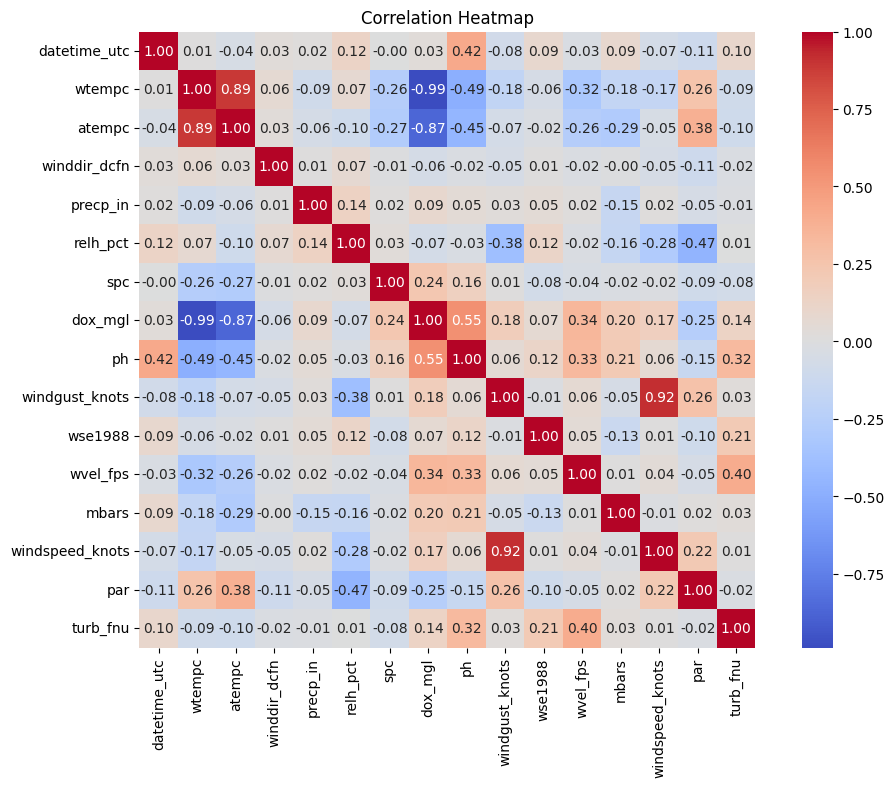

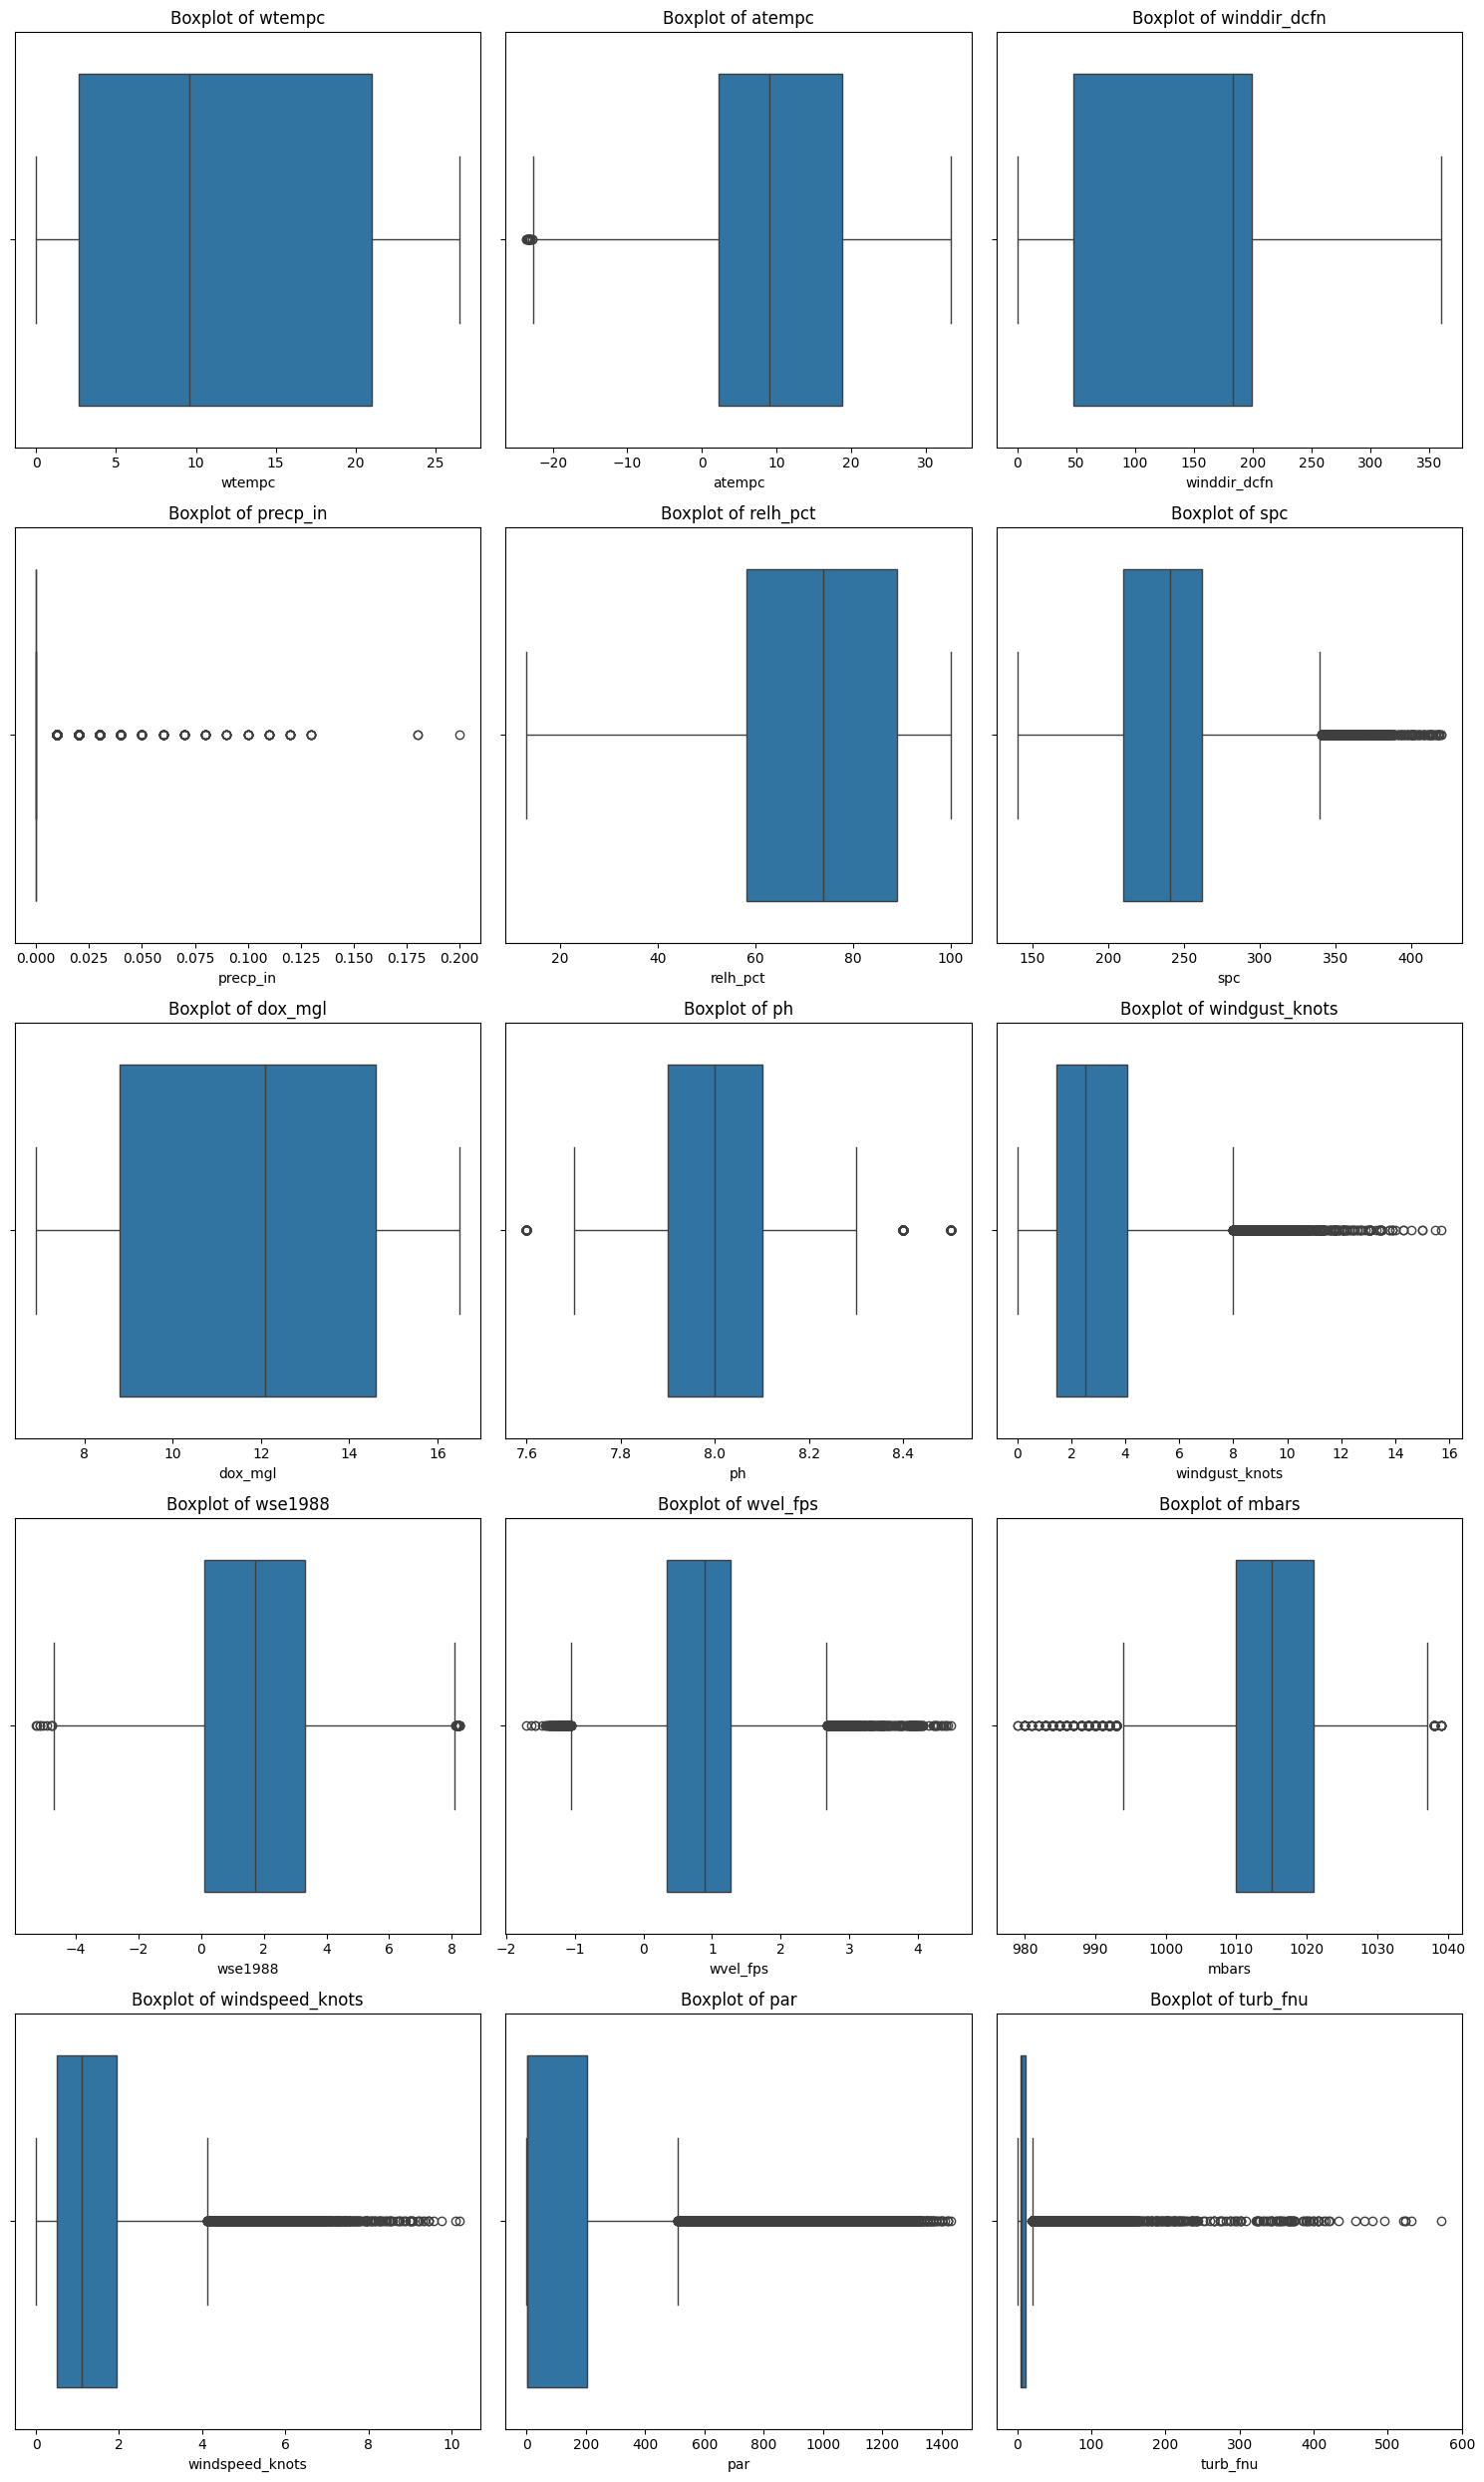

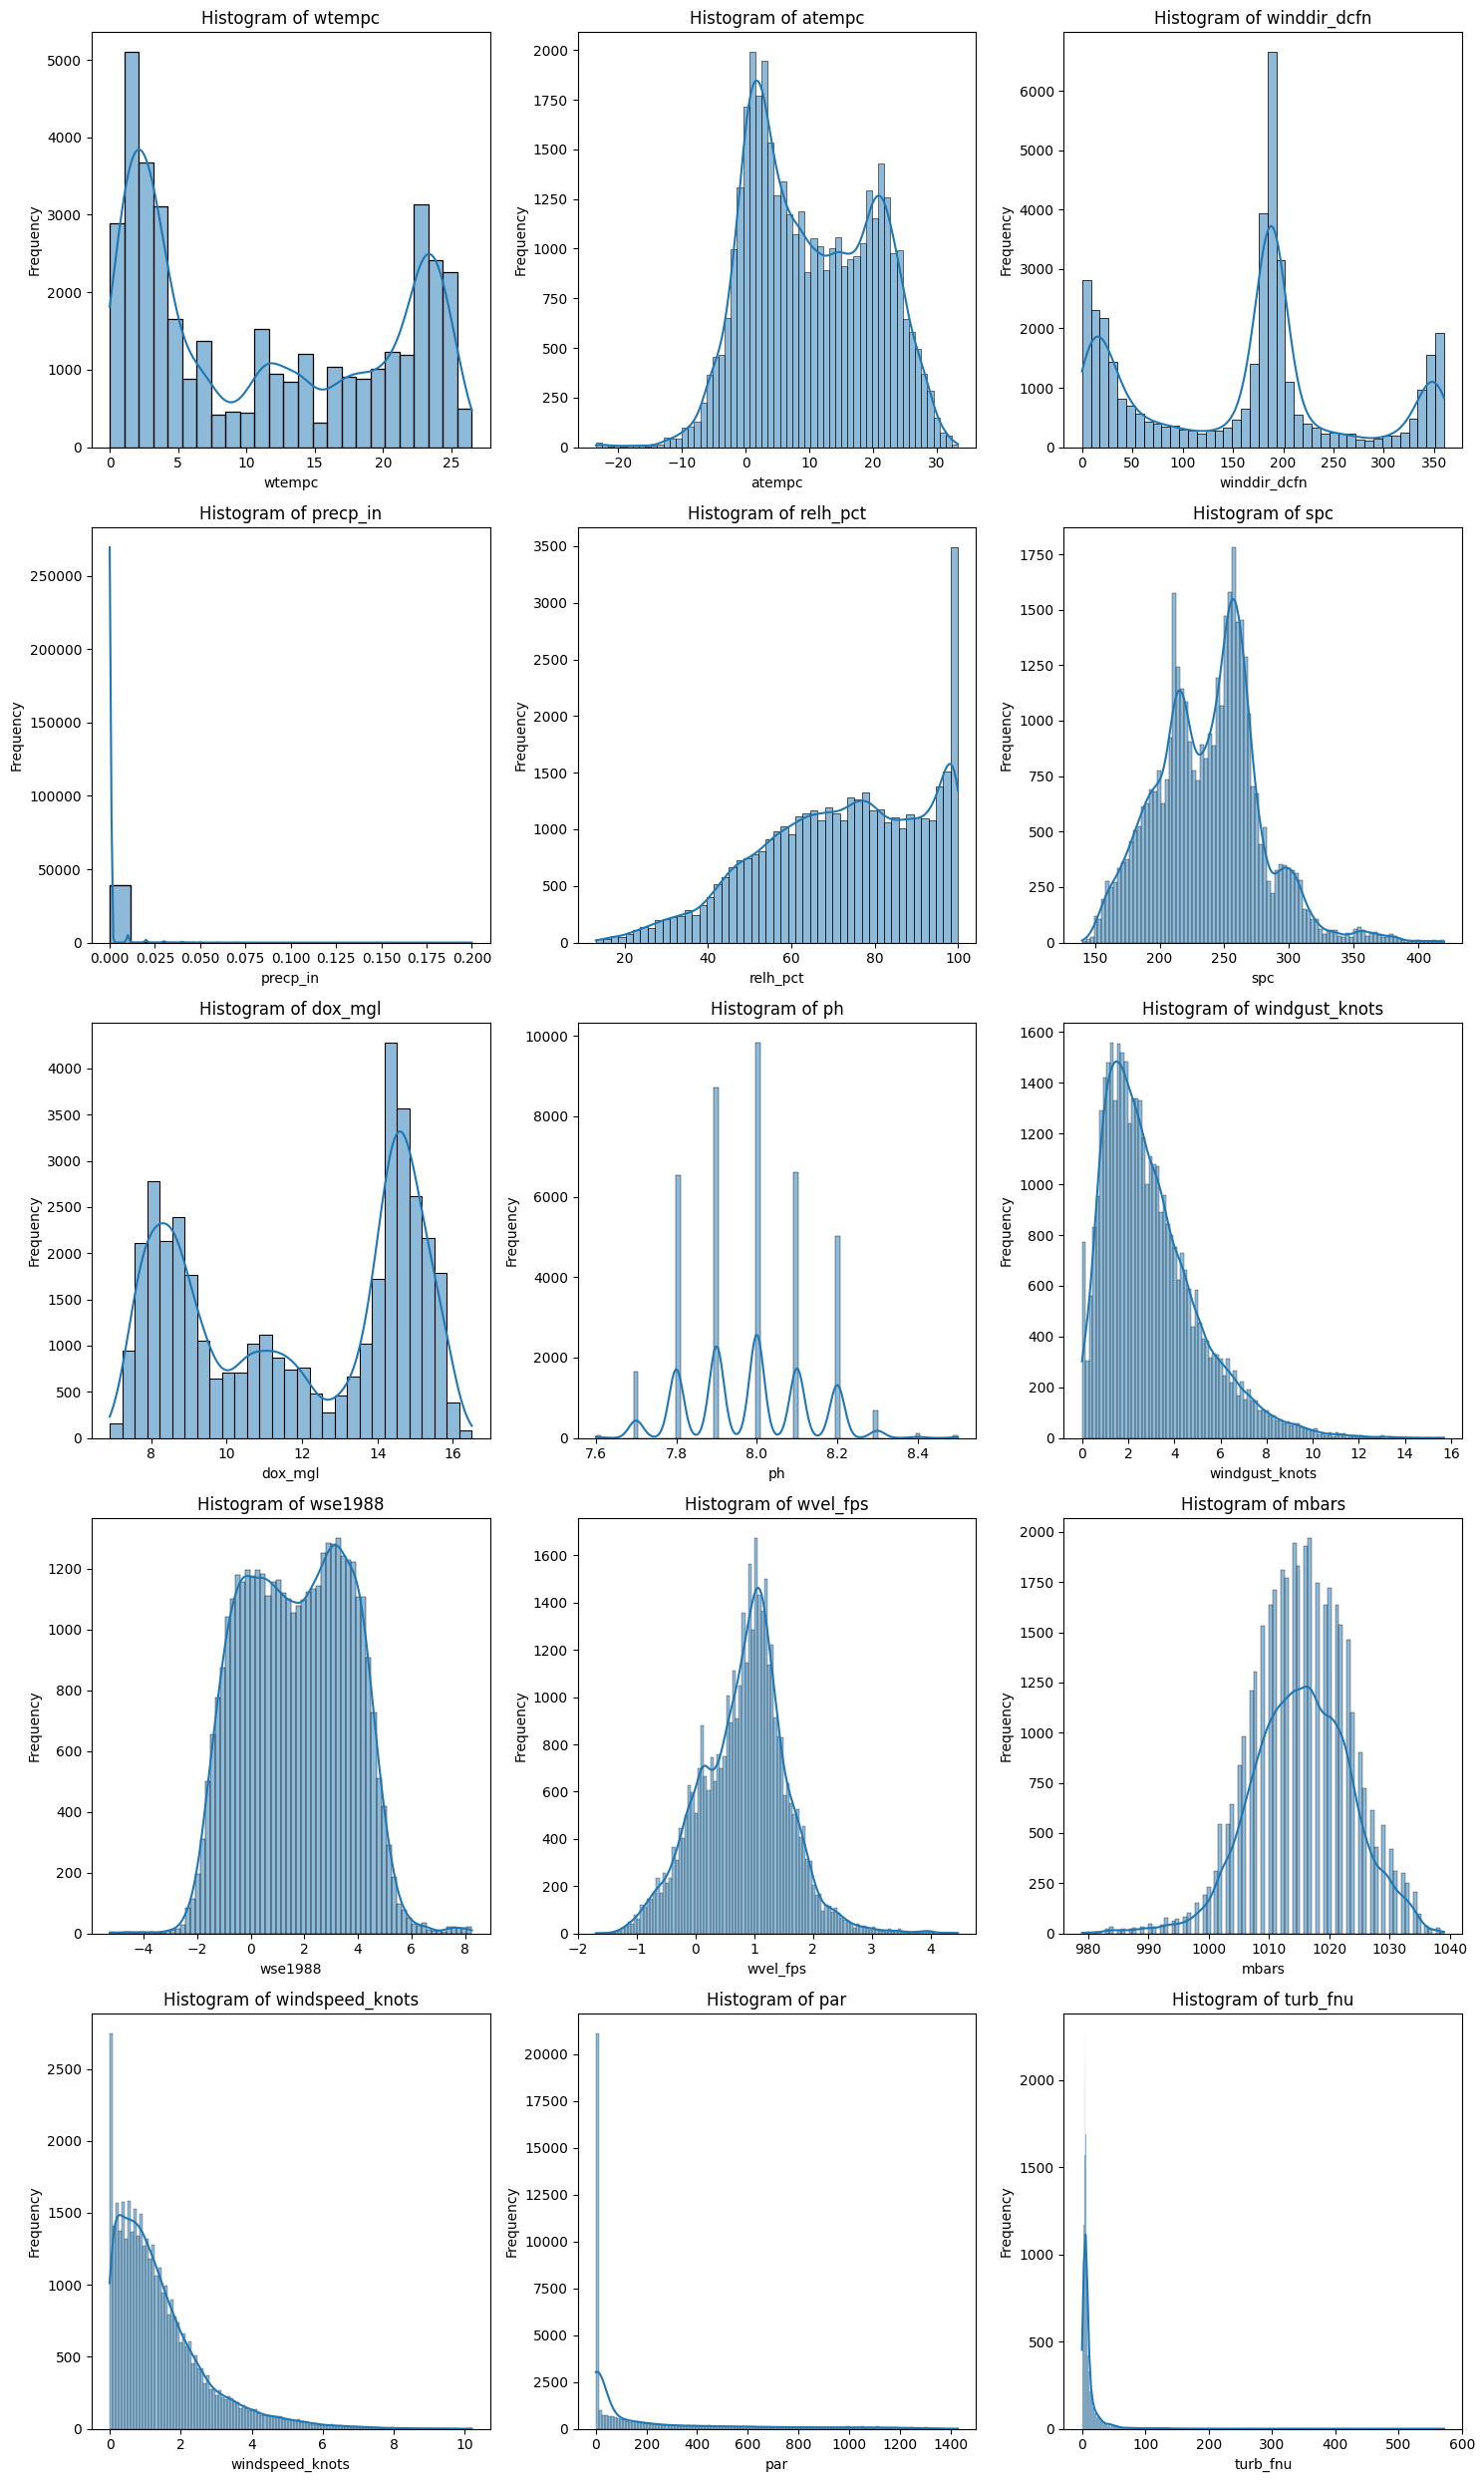

In [18]:
plot_correlation_heatmap(data)
plot_boxplots(data)
plot_histograms(data)

In [31]:
description = pd.DataFrame(data.describe())
min_count = description.loc['count'].min()
print(min_count)
min_feature = description.columns[description.loc['count']==min_count][0]
print(min_feature)

37279.0
turb_fnu
